In [2]:
# Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")


In [4]:
# Load Data

In [5]:
df = pd.read_csv("../data/udyogaa_synthetic.csv")
df.head()


,candidate_id,response_delay_hours,number_of_active_offers,past_job_switches,avg_tenure_months,notice_period_days,salary_expectation_lpa,salary_offered_lpa,salary_hike_percent,interview_sentiment,communication_score,technical_score,background_verified,joined
0,1,11.262434,2,5,35,0,13.907110,13.246590,-4.749512,0.575769,63,56,1,1
1,2,72.242914,1,0,41,60,19.621105,22.897034,16.695945,0.550962,88,65,1,1
2,3,31.601897,2,5,39,60,6.940824,8.715139,25.563463,0.960107,72,77,1,0
3,4,21.910621,1,4,21,15,18.085110,19.354914,7.021266,0.552186,62,53,1,1
4,5,4.070997,1,5,29,0,8.962846,9.549077,6.540674,0.846232,48,92,1,1


In [6]:
df.isnull().sum()
df.duplicated().sum()


np.int64(0)

Dataset is clean with no missing or duplicate records, indicating controlled synthetic generation.

In [7]:
# Data Info

In [8]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   candidate_id             3000 non-null   int64  
 1   response_delay_hours     3000 non-null   float64
 2   number_of_active_offers  3000 non-null   int64  
 3   past_job_switches        3000 non-null   int64  
 4   avg_tenure_months        3000 non-null   int64  
 5   notice_period_days       3000 non-null   int64  
 6   salary_expectation_lpa   3000 non-null   float64
 7   salary_offered_lpa       3000 non-null   float64
 8   salary_hike_percent      3000 non-null   float64
 9   interview_sentiment      3000 non-null   float64
 10  communication_score      3000 non-null   int64  
 11  technical_score          3000 non-null   int64  
 12  background_verified      3000 non-null   int64  
 13  joined                   3000 non-null   int64  
dtypes: float64(5), int64(9)


,candidate_id,response_delay_hours,number_of_active_offers,past_job_switches,avg_tenure_months,notice_period_days,salary_expectation_lpa,salary_offered_lpa,salary_hike_percent,interview_sentiment,communication_score,technical_score,background_verified,joined
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,24.086349,0.773667,2.566667,26.335000,38.565000,14.626178,16.140276,10.455067,0.510056,64.382333,69.379000,0.902333,0.784333
std,866.169729,23.950857,0.870264,1.701329,12.040616,32.322036,6.024057,6.861984,11.557216,0.289424,20.016952,17.337249,0.296913,0.411353
min,1.000000,0.000279,0.000000,0.000000,6.000000,0.000000,4.005302,3.730020,-9.975535,0.000048,30.000000,40.000000,0.000000,0.000000
25%,750.750000,6.770523,0.000000,1.000000,16.000000,15.000000,9.529684,10.376938,0.732613,0.260339,47.000000,54.000000,1.000000,1.000000
50%,1500.500000,16.893898,1.000000,3.000000,26.000000,30.000000,14.819127,16.229779,10.332671,0.514713,64.000000,69.000000,1.000000,1.000000
75%,2250.250000,33.690824,1.000000,4.000000,37.000000,60.000000,19.727992,21.530042,20.419033,0.759632,81.000000,85.000000,1.000000,1.000000
max,3000.000000,196.138694,5.000000,5.000000,47.000000,90.000000,24.998421,31.783462,29.996039,0.999656,99.000000,99.000000,1.000000,1.000000


In [9]:
# Target Distribution

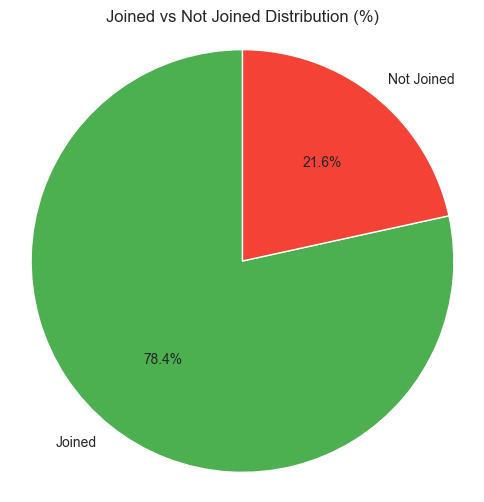

joined
1    78.43
0    21.57
Name: proportion, dtype: float64


In [10]:
# Joined Distribution (Pie Chart with Percentage)

joined_counts = df["joined"].value_counts()
labels = ["Joined", "Not Joined"]

plt.figure(figsize=(6,6))
plt.pie(
    joined_counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=["#4CAF50", "#F44336"]
)
plt.title("Joined vs Not Joined Distribution (%)")
plt.axis("equal")
plt.show()

# Also print exact percentage
print((df["joined"].value_counts(normalize=True) * 100).round(2))



The dataset shows moderate class imbalance. While not extreme, stratified sampling should be used during train-test split.

In [11]:
# Correlation Heatmap

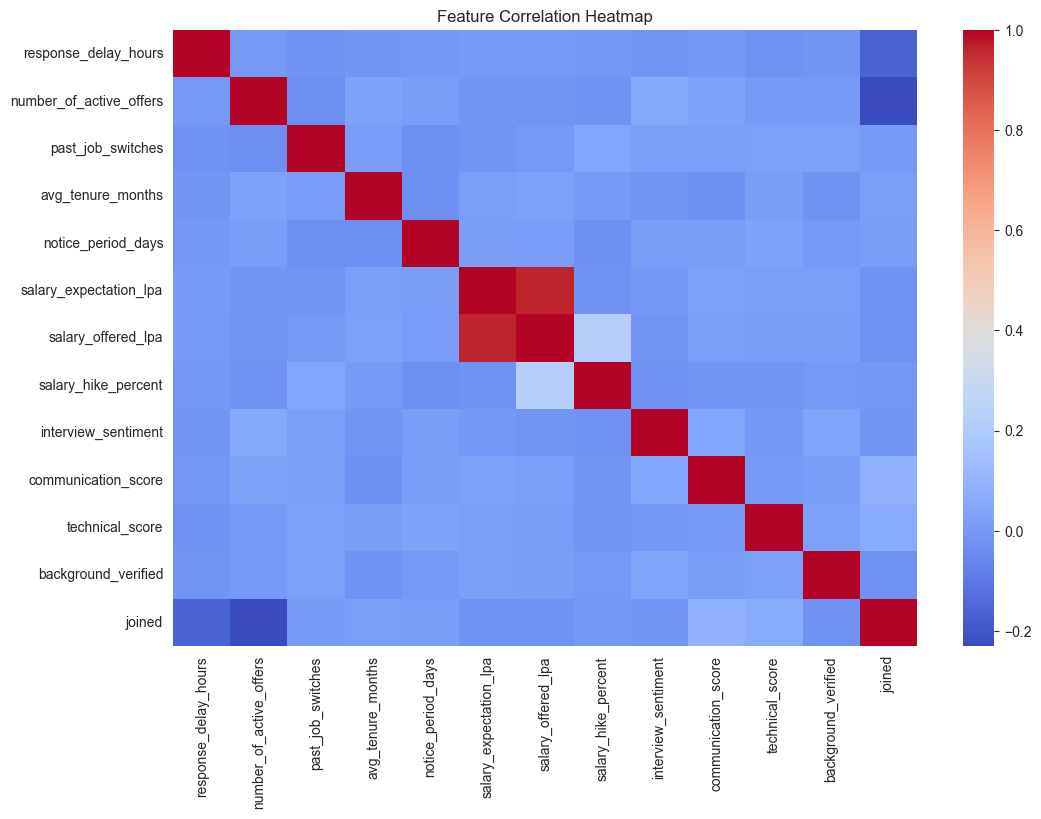

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(df.drop(columns=["candidate_id"]).corr(), cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


observation:-
- salary_expectation & salary_offered highly correlated
- salary_gap negatively correlated with joined
- response_delay slightly negative with joined
- communication_score slightly positive with joined

In [13]:
# Feature Distribution

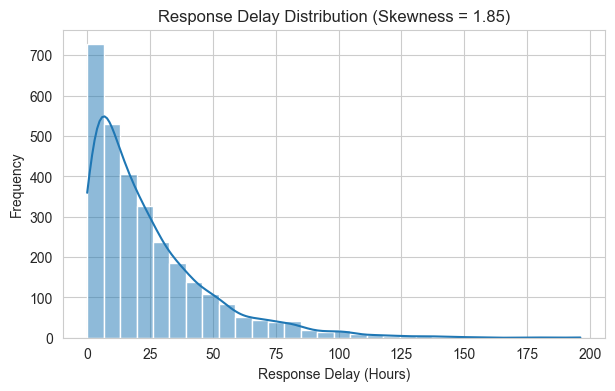

Skewness of Response Delay: 1.85


In [14]:
# Response Delay Distribution with Skewness

skew_value = df["response_delay_hours"].skew()

plt.figure(figsize=(7,4))
sns.histplot(df["response_delay_hours"], kde=True, bins=30)
plt.title(f"Response Delay Distribution (Skewness = {skew_value:.2f})")
plt.xlabel("Response Delay (Hours)")
plt.ylabel("Frequency")
plt.show()

print(f"Skewness of Response Delay: {skew_value:.2f}")


High positive skew indicates that most candidates respond quickly, but a small group shows significant delay. These extreme delays may be early indicators of disengagement risk.

In [15]:
# Salary Gap Analysis

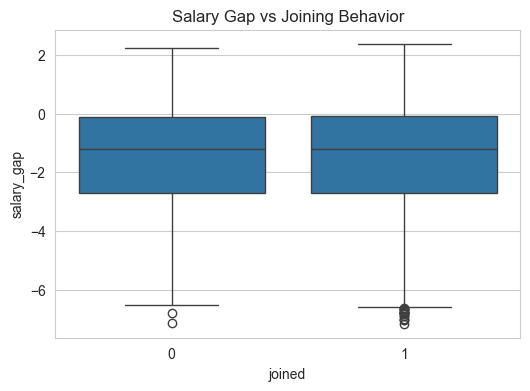

In [16]:
df["salary_gap"] = df["salary_expectation_lpa"] - df["salary_offered_lpa"]

plt.figure(figsize=(6,4))
sns.boxplot(x="joined", y="salary_gap", data=df)
plt.title("Salary Gap vs Joining Behavior")
plt.show()


observation:
- Distributions overlap heavily
- Not strong separation

In [17]:
# Feature vs Target Comparison

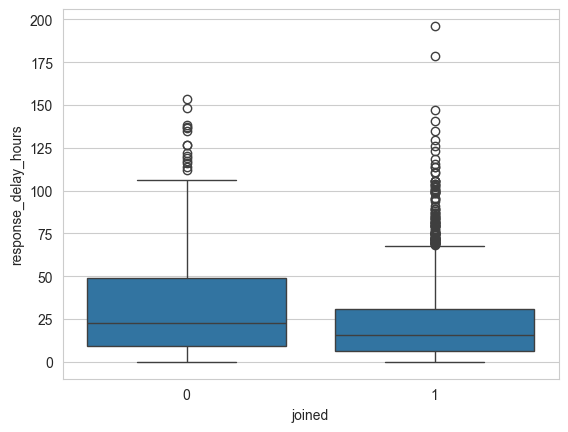

In [19]:
sns.boxplot(x="joined", y="response_delay_hours", data=df)
plt.show()


Candidates who delay responses tend to have a higher probability of backout, making response time a valuable early risk signal

In [20]:
# Communication Score vs Joined

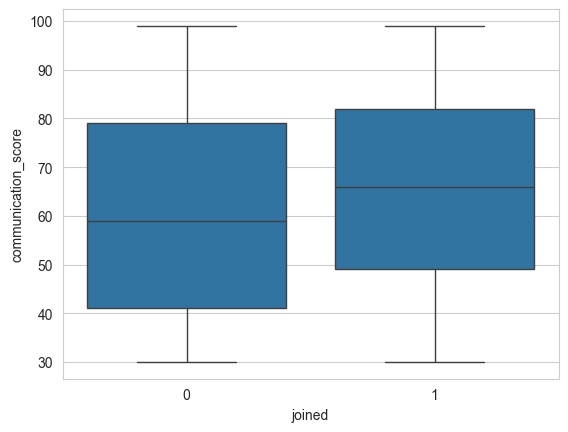

In [21]:
sns.boxplot(x="joined", y="communication_score", data=df)
plt.show()


Strong communication skills correlate positively with joining probability, potentially reflecting higher engagement and professionalism


In [22]:
# Multi-feature Insight

<Axes: xlabel='salary_gap', ylabel='response_delay_hours'>

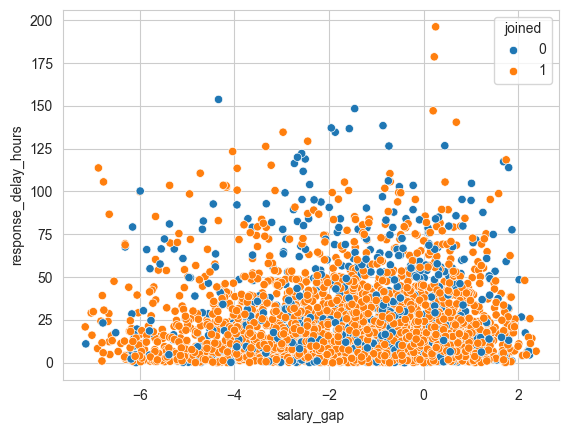

In [23]:
sns.scatterplot(
    x="salary_gap",
    y="response_delay_hours",
    hue="joined",
    data=df
)


The overlap between joined and non-joined candidates suggests that joining behavior is influenced by nonlinear interactions rather than simple threshold-based rules. This justifies the use of tree-based models like XGBoost

### Final Observations

1. Joining behavior is influenced by a combination of financial, behavioral, and engagement signals.
2. Salary gap alone does not determine outcome.
3. Response delay is a strong behavioral risk indicator.
4. Communication quality positively impacts joining likelihood.
5. Nonlinear interactions justify tree-based modeling approach.
